In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
from datetime import datetime, date
from pytz import timezone, all_timezones
import re
from collections import defaultdict
import plotly.express as px

In [38]:
data= pd.read_csv('Maquinas-Tset2.csv')
data.head(10)

,FECHA,TRABAJO A REALIZAR,TRABAJO REALIZADO,MANTENIMEINTO,ORDEN,RESPONSABLE,MAQUINA
0,07/01/2019,REVISION TERMOPAR Z-18,FALLA Z-18,INT,30686,MARCOS,1.0
1,10/01/2019,REVISION TERMOPAR Z-19,FALLA Z-19,INT,30686,ALFONSO,1.0
2,11/01/2019,REVISION TERMOPAR Z-20,FALLA Z-20,INT,30686,ALFONSO,1.0
3,12/01/2019,REVISION TERMOPAR Z-21,FALLA Z-21,INT,30686,ALFONSO,1.0
4,13/01/2019,REVISION TERMOPAR Z-22,FALLA Z-22,INT,30686,GERARDO,1.0
5,14/01/2019,REVISION TERMOPAR Z-23,FALLA Z-23,INT,30686,ALFONSO,1.0
6,15/01/2019,REVISION TERMOPAR Z-24,FALLA Z-24,INT,30686,MARCELO,1.0
7,16/01/2019,REVISION TERMOPAR Z-25,FALLA Z-25,INT,30686,GERARDO,1.0
8,17/01/2019,REVISION TERMOPAR Z-26,FALLA Z-26,INT,30686,GERARDO,1.0
9,18/01/2019,REVISION TERMOPAR Z-27,FALLA Z-27,INT,30686,ALFONSO,1.0


Cambiando el nombre de algunas columnas que tienen espacios

In [39]:
data.columns = ['FECHA', 'TRABAJO_A_REALIZAR', 'TRABAJO_REALIZADO', 'MANTENIMIENTO',
              'ORDEN', 'RESPONSABLE', 'MAQUINA']

In [40]:
data.shape

(207, 7)

In [41]:
data.dtypes

FECHA                  object
TRABAJO_A_REALIZAR     object
TRABAJO_REALIZADO      object
MANTENIMIENTO          object
ORDEN                  object
RESPONSABLE            object
MAQUINA               float64
dtype: object

In [42]:
data.isnull().sum()

FECHA                 0
TRABAJO_A_REALIZAR    0
TRABAJO_REALIZADO     0
MANTENIMIENTO         0
ORDEN                 0
RESPONSABLE           0
MAQUINA               0
dtype: int64

In [43]:
#hay que empezar a asociar categorias
#cambiamos el tipo de dato de fecha a una lista
fechas = data['FECHA'].tolist()
print(fechas)
fecha_dt = []
for x in range(len(fechas)):
  dia = fechas[x]
  fecha_dt.append(datetime.strptime(fechas[x],'%d/%m/%Y'))
print(fecha_dt)

['07/01/2019', '10/01/2019', '11/01/2019', '12/01/2019', '13/01/2019', '14/01/2019', '15/01/2019', '16/01/2019', '17/01/2019', '18/01/2019', '19/01/2019', '20/01/2019', '21/01/2019', '22/01/2019', '23/01/2019', '24/01/2019', '25/01/2019', '26/01/2019', '27/01/2019', '28/01/2019', '29/01/2019', '30/01/2019', '31/01/2019', '01/02/2019', '02/02/2019', '03/02/2019', '04/02/2019', '14/01/2019', '21/01/2019', '01/02/2019', '11/02/2019', '13/02/2019', '26/02/2019', '04/03/2019', '08/03/2019', '11/03/2019', '13/03/2019', '19/03/2019', '29/03/2019', '01/04/2019', '24/04/2019', '06/05/2019', '15/05/2019', '08/06/2019', '22/07/2019', '06/09/2019', '09/09/2019', '23/09/2019', '30/09/2019', '07/10/2019', '28/10/2019', '03/01/2019', '08/01/2019', '08/01/2019', '09/01/2019', '09/01/2019', '09/01/2019', '12/01/2019', '15/01/2019', '15/01/2019', '17/01/2019', '17/01/2019', '24/01/2019', '05/02/2019', '06/02/2019', '07/02/2019', '11/02/2019', '26/02/2019', '05/03/2019', '13/03/2019', '14/03/2019', '25/0

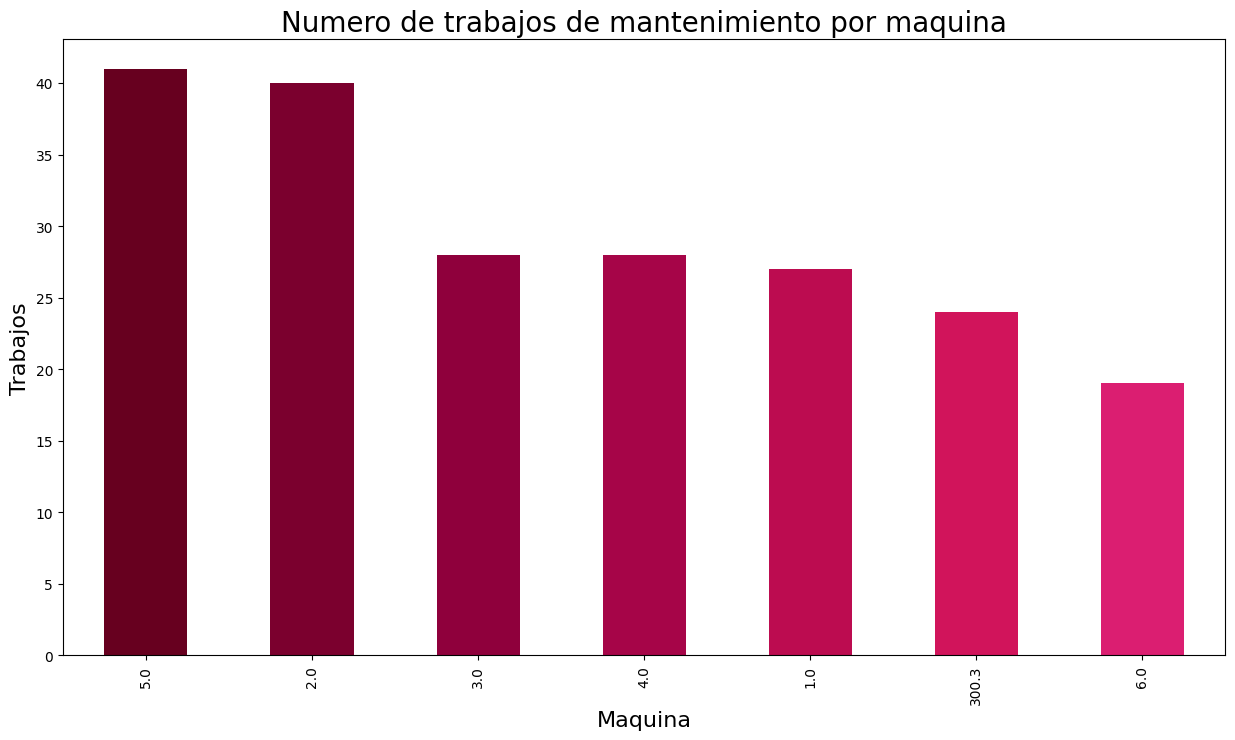

In [44]:
data.MAQUINA.value_counts().head(8).plot.bar()
plt.rcParams['figure.figsize'] = (15,8) #otorgar parametros a mi figura (figura (1), figsize(x,x))
color = plt.cm.PuRd(np.linspace(1,0,20)) #cmap de python, escalas de colores, intervalo, PuRd tonos de colores 
data['MAQUINA'].value_counts().sort_values(ascending = False).head(20).plot.bar(color = color)
plt.title('Numero de trabajos de mantenimiento por maquina', fontsize = 20)
plt.xlabel('Maquina', fontsize = 16)
plt.ylabel('Trabajos',fontsize=16)
plt.show()


ALFONSO        70
GERARDO        65
MARCOS         25
MARCELO        14
MAXIMILIANO    10
VICTOR          4
BENITO          3
DANIEL          3
Name: RESPONSABLE, dtype: int64


<Axes: >

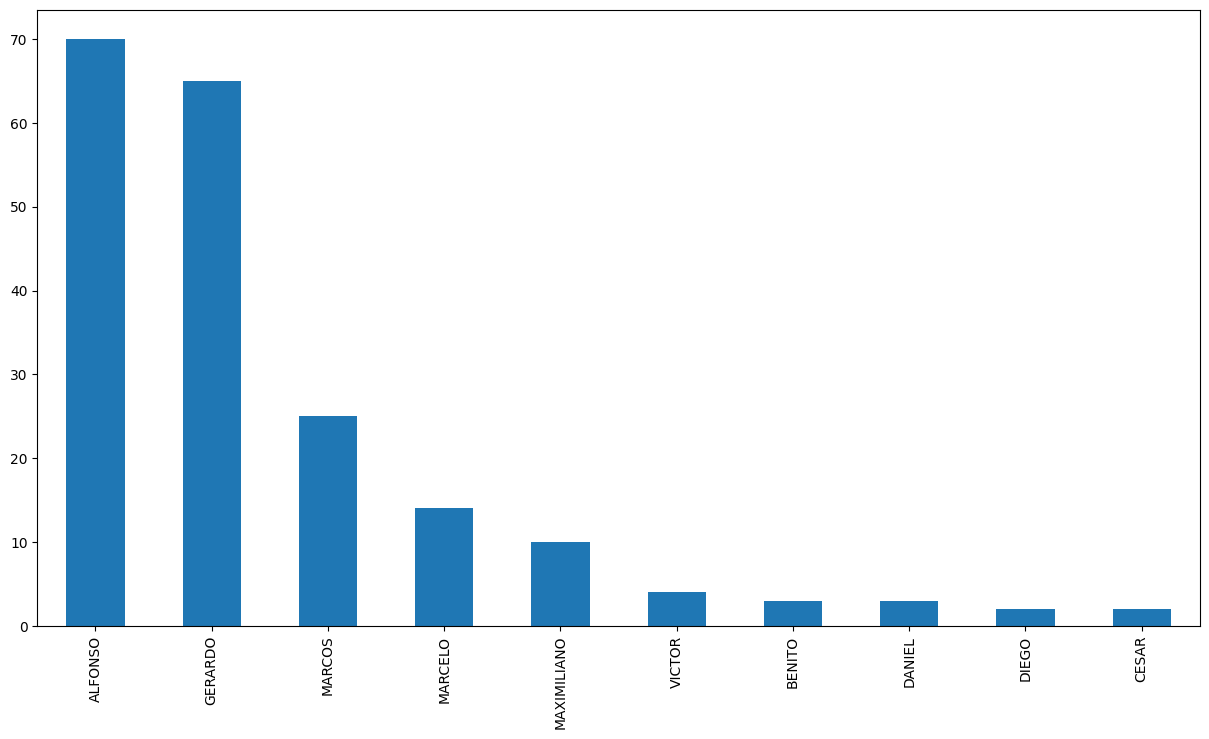

In [45]:
#numero de reportes realizados por el eq. de mantenimiento
reportes_op = data.RESPONSABLE.value_counts().head(8)
print(reportes_op)
data.RESPONSABLE.value_counts().head(10).plot.bar()

In [46]:
#fecha_dt = data['FECHA'].tolist()
fecha_dt = pd.DataFrame(fecha_dt, columns = ['FECHA'])
job_done = data['TRABAJO_REALIZADO'].tolist()
job_done = pd.DataFrame(job_done, columns = ['TRABAJO_REALIZADO'])
machine = data['MAQUINA'].tolist()
machine = pd.DataFrame(machine, columns = ['MAQUINA'])
frames = [fecha_dt,job_done,machine] # las variables que son columnas van dentro de los corchetes, como lista
fallas = pd.concat(frames, axis = 1)
fallas.head(10)

,FECHA,TRABAJO_REALIZADO,MAQUINA
0,2019-01-07,FALLA Z-18,1.0
1,2019-01-10,FALLA Z-19,1.0
2,2019-01-11,FALLA Z-20,1.0
3,2019-01-12,FALLA Z-21,1.0
4,2019-01-13,FALLA Z-22,1.0
5,2019-01-14,FALLA Z-23,1.0
6,2019-01-15,FALLA Z-24,1.0
7,2019-01-16,FALLA Z-25,1.0
8,2019-01-17,FALLA Z-26,1.0
9,2019-01-18,FALLA Z-27,1.0


In [47]:
fallas.dtypes

FECHA                datetime64[ns]
TRABAJO_REALIZADO            object
MAQUINA                     float64
dtype: object

In [48]:
fallas.shape

(207, 3)

###Numero de fallas a traves del tiempo

In [49]:
fecha_min = fallas['FECHA'].min()
print(fecha_min)
fecha_max = fallas['FECHA'].max()
print(fecha_max)
med = fecha_max - fecha_min
print(med)
fecha_media = fecha_max-(med/2)
print(fecha_media) # esta es la fecha media 

2019-01-03 00:00:00
2019-11-01 00:00:00
302 days 00:00:00
2019-06-03 00:00:00


In [50]:
fallas.groupby(['FECHA'])['MAQUINA'].value_counts()

FECHA       MAQUINA
2019-01-03  2.0        1
            3.0        1
2019-01-04  3.0        1
2019-01-07  1.0        1
            3.0        1
                      ..
2019-10-28  6.0        1
            300.3      1
2019-10-29  4.0        1
2019-11-01  2.0        1
            5.0        1
Name: MAQUINA, Length: 175, dtype: int64

In [52]:
grupo1 = (fallas['FECHA'] > fecha_min) & (fallas['FECHA'] <= fecha_media)
grupo2 = (fallas['FECHA'] > fecha_media) & (fallas['FECHA'] <= fecha_max)
mitad1=fallas.loc[grupo1]
mitad2=fallas.loc[grupo2]
mitad1.sort_values(by = 'FECHA')

,FECHA,TRABAJO_REALIZADO,MAQUINA
92,2019-01-04,SE AJUSTA EXPULSION Y POSICIONES,3.0
0,2019-01-07,FALLA Z-18,1.0
93,2019-01-07,SE ACOPLA PISTON DE EXPULSION FLOJO,3.0
53,2019-01-08,CORRIGE FALLA,2.0
188,2019-01-08,SE REVIZA ACOPLAMIENTO YA QUE SE SOBRECARGO MOTOR,6.0
...,...,...,...
167,2019-05-22,CAMBIO DE ACOPLAMIENTO DE BOMBA,5.0
168,2019-05-23,REVISION DE ZONA 19 NO CONTROLA,5.0
193,2019-05-23,REVISION DE RESISTENCIAS,6.0
169,2019-05-24,SE CORRIGE FUGA DE AIRE EN ROBOT,5.0


In [53]:
mitad2.sort_values(by = 'FECHA')

,FECHA,TRABAJO_REALIZADO,MAQUINA
43,2019-06-08,BAJA HUSILLO,300.3
172,2019-06-10,SE CHECA OK,5.0
171,2019-06-10,SE CORRIGE FUGA DE AIRE MANGUERA FRISURADA,5.0
135,2019-06-21,SE BAJO Y LIMPIO EL HUSILLO. SE ENCONTRO MATER...,4.0
173,2019-06-26,SE CAMBIA RELEVADOR,5.0
...,...,...,...
88,2019-10-28,DESTAPA TRAMPA,2.0
50,2019-10-28,LIMPIA TRAMPA,300.3
146,2019-10-29,SE DESTAPA CONECTOR DE MANGUERA DE MEDIDOR DE ...,4.0
90,2019-11-01,CAMBIA CABLE,2.0


In [54]:
mitad1.groupby(['FECHA'])['MAQUINA'].unique()

FECHA
2019-01-04              [3.0]
2019-01-07         [1.0, 3.0]
2019-01-08    [2.0, 5.0, 6.0]
2019-01-09              [2.0]
2019-01-10              [1.0]
                   ...       
2019-05-20              [6.0]
2019-05-22              [5.0]
2019-05-23         [5.0, 6.0]
2019-05-24              [5.0]
2019-05-28              [5.0]
Name: MAQUINA, Length: 77, dtype: object

In [55]:
mitad2.groupby(['FECHA'])['MAQUINA'].unique()

FECHA
2019-06-08                   [300.3]
2019-06-10                     [5.0]
2019-06-21                     [4.0]
2019-06-26                     [5.0]
2019-07-05                     [4.0]
2019-07-07                     [4.0]
2019-07-08                [3.0, 4.0]
2019-07-09                     [4.0]
2019-07-10                     [4.0]
2019-07-16                     [6.0]
2019-07-18                     [3.0]
2019-07-22              [300.3, 3.0]
2019-07-24                     [2.0]
2019-07-26                     [5.0]
2019-08-01                     [3.0]
2019-08-07                     [2.0]
2019-08-13                     [5.0]
2019-08-17                     [5.0]
2019-08-21                [2.0, 3.0]
2019-08-22                     [2.0]
2019-08-23                     [2.0]
2019-08-26                     [2.0]
2019-08-27                     [2.0]
2019-08-29                     [5.0]
2019-09-02                [3.0, 6.0]
2019-09-04                     [3.0]
2019-09-05                     [

###Fallas frecuentes por maquina

Analisis en maquina 300.3

In [56]:
maq_300 = fallas.loc[(data['MAQUINA']==300.3)]
maq_300.head(10)

,FECHA,TRABAJO_REALIZADO,MAQUINA
27,2019-01-14,REVISO ZONA 19,300.3
28,2019-01-21,VALVULA ABIERTA,300.3
29,2019-02-01,DESTAPA TRAMPA,300.3
30,2019-02-11,SE PONE A NIVEL,300.3
31,2019-02-13,LIMPIA FILTRO Y SE PURGA,300.3
32,2019-02-26,DESPEGAN PALETAS Y TRAMPA,300.3
33,2019-03-04,NO ENCIENDE BOMBA,300.3
34,2019-03-08,COLOCA BASE DE GUARDA,300.3
35,2019-03-11,CAMBIA POLARIDAD,300.3
36,2019-03-13,DESPEGAN PALETAS Y TRAMPA,300.3


In [57]:
maq_300.shape

(24, 3)

In [58]:
maq_300.TRABAJO_REALIZADO.value_counts()

DESTAPA TRAMPA               2
CAMBIA MANGUERA              2
DESPEGAN PALETAS Y TRAMPA    2
REVISO ZONA 19               1
CAMBIA BOMBA DE VACIO        1
REVISA ROBOT                 1
LIMPIEZA ACEITE              1
SOPLETEO INTERCAMBIADOR      1
LIMPIA CUBO DE BOMBA         1
BAJA HUSILLO                 1
CABLES EN CORTO              1
AGREGAR NIVEL DE ACEITE      1
CHECAR RESISTENCIA           1
VALVULA ABIERTA              1
LIMPIA SENSOR Y REINICIA     1
CAMBIA POLARIDAD             1
COLOCA BASE DE GUARDA        1
NO ENCIENDE BOMBA            1
LIMPIA FILTRO Y SE PURGA     1
SE PONE A NIVEL              1
LIMPIA TRAMPA                1
Name: TRABAJO_REALIZADO, dtype: int64

Fechas de mantenimiento de la maquina 300.3

In [59]:
print(data.loc[data['TRABAJO_A_REALIZAR'].str.endswith('MOLDE')])
#LA INSTRUCCION str.endswith devuelve los registros en los cuales el trabajo 
#a realizar (el registro)termina con la palabra "MOLDE"

          FECHA                       TRABAJO_A_REALIZAR  \
27   14/01/2019             CHECAR RESISTENCIAS AL MOLDE   
28   21/01/2019                   REVISAR VACIO DE MOLDE   
145  22/10/2019  ROBOT MARCA ALARMA DE POSICION DE MOLDE   

                TRABAJO_REALIZADO MANTENIMIENTO  ORDEN  RESPONSABLE  MAQUINA  
27                 REVISO ZONA 19           INT  30820  MAXIMILIANO    300.3  
28                VALVULA ABIERTA           INT  30852       MARCOS    300.3  
145  SE REVISA SEGURIDAD DE ROBOT          INT   32516      GERARDO      4.0  


In [60]:
maq_5 = fallas.loc[(data['MAQUINA']==5.0)]
maq_5.head(10)

,FECHA,TRABAJO_REALIZADO,MAQUINA
147,2019-01-24,SE ENCUENTRA FALSO EN EL TERMOPAR DE MOLDE,5.0
148,2019-02-18,SE LIMPIA FILTRO POR TEMP ELEVADA,5.0
149,2019-02-19,TEMPERATURAS DE ACEITE ALTO,5.0
150,2019-02-20,SE LIMPIAN FILTROS DE ACEITE,5.0
151,2019-02-22,SE RECIRCULA ACEITE HIDRAULICO,5.0
152,2019-01-08,TEMPERATURA ALTA DE CHILLER 36ø,5.0
153,2019-01-24,SE REVISA ACOPLAMIENTO,5.0
154,2019-02-18,"SE REVISAN LAS ZONAS, SE CORRIGE FALLA OK",5.0
155,2019-02-18,"SE SOPLETEAFILTRO, SE MANITOREA",5.0
156,2019-02-19,SE BAJA TEMPERATURA ALTA DE CHILLER,5.0


In [61]:
maq_5.TRABAJO_REALIZADO.value_counts()

SE ENCUENTRA FALSO EN EL TERMOPAR DE MOLDE                                          1
REVISION DE ZONA 19 NO CONTROLA                                                     1
SE REVISA RESISTENCIA                                                               1
SE CORRIGE FUGA DE AIRE MANGUERA FRISURADA                                          1
SE CHECA OK                                                                         1
SE CAMBIA RELEVADOR                                                                 1
SE ESPERA A QUE SUBA TEMPERATURA                                                    1
DIAGNOSTICO DE ROBOT                                                                1
 SE CAMBIO VARIADOR EJE Z Y Y Y SERVOMOTORES                                        1
SE CAMBIA RELEVADOR DE SEGURIDAD DA¥ADO                                             1
SE ARREGLO TEMPERATURA DE ACEITE BAJO OK                                            1
SE SOPLETEO INTERCAMBIADOR                            

### Busqueda de trabajos de mantenimiento que más se repiten

buscando por palabras

In [62]:
trabajos = ['fuga', 'resistencia', 'termopar', 'bomba', 'husillo', 'aceite', 'zona', 'temperatura', 'falla']

In [63]:
trab_realizados1 = data['TRABAJO_REALIZADO'].tolist() #convertir a lista
print(trab_realizados1)

['FALLA Z-18', 'FALLA Z-19', 'FALLA Z-20', 'FALLA Z-21', 'FALLA Z-22', 'FALLA Z-23', 'FALLA Z-24', 'FALLA Z-25', 'FALLA Z-26', 'FALLA Z-27', 'FALLA Z-28', 'FALLA Z-29', 'FALLA Z-30', 'FALLA Z-31', 'FALLA Z-32', 'FALLA Z-33', 'FALLA Z-34', 'FALLA Z-35', 'FALLA Z-36', 'FALLA Z-37', 'FALLA Z-38', 'FALLA Z-39', 'FALLA Z-40', 'FALLA Z-41', 'FALLA Z-42', 'FALLA Z-43', 'FALLA Z-44', 'REVISO ZONA 19', 'VALVULA ABIERTA', 'DESTAPA TRAMPA', 'SE PONE A NIVEL', 'LIMPIA FILTRO Y SE PURGA', 'DESPEGAN PALETAS Y TRAMPA', 'NO ENCIENDE BOMBA', 'COLOCA BASE DE GUARDA', 'CAMBIA POLARIDAD', 'DESPEGAN PALETAS Y TRAMPA', 'LIMPIA SENSOR Y REINICIA', 'DESTAPA TRAMPA', 'AGREGAR NIVEL DE ACEITE', 'CHECAR RESISTENCIA', 'CAMBIA BOMBA DE VACIO', 'CABLES EN CORTO', 'BAJA HUSILLO', 'LIMPIA CUBO DE BOMBA', 'SOPLETEO INTERCAMBIADOR', 'LIMPIEZA ACEITE', 'REVISA ROBOT', 'CAMBIA MANGUERA', 'CAMBIA MANGUERA', 'LIMPIA TRAMPA', 'CAMBIO DE HUSILLO', 'CORRIGE FALLA', 'CORRIGE FALLA', 'LIMPIA TRAMPA', 'SOPLETEO TABLERO', 'CORRIG

In [64]:
min_cal = "".join(str(v) for v in trab_realizados1).lower() 
print(min_cal)

falla z-18falla z-19falla z-20falla z-21falla z-22falla z-23falla z-24falla z-25falla z-26falla z-27falla z-28falla z-29falla z-30falla z-31falla z-32falla z-33falla z-34falla z-35falla z-36falla z-37falla z-38falla z-39falla z-40falla z-41falla z-42falla z-43falla z-44reviso zona 19valvula abiertadestapa trampase pone a nivellimpia filtro y se purgadespegan paletas y trampano enciende bombacoloca base de guardacambia polaridaddespegan paletas y trampalimpia sensor y reiniciadestapa trampaagregar nivel de aceitechecar resistenciacambia bomba de vaciocables en cortobaja husillolimpia cubo de bombasopleteo intercambiadorlimpieza aceiterevisa robotcambia mangueracambia mangueralimpia trampacambio de husillocorrige fallacorrige fallalimpia trampasopleteo tablerocorrige fallacambio de osciladorcambia cablelimpia sistema vaciofalla el conectorsopletea pantallacoloca 3m de cablepurga airesopletea tarjetasopletea variador sopletea cpucambio de pantalla entre maqscambio de aceitedestraba valvul

In [65]:
cont_palabras = dict((x,0) for x in trabajos) #keys: value
for w in re.findall(r"[\w'+#-]+|[.!?;’]", min_cal):
  if w in cont_palabras:
    cont_palabras[w] +=1
print(cont_palabras)

{'fuga': 4, 'resistencia': 2, 'termopar': 3, 'bomba': 4, 'husillo': 1, 'aceite': 11, 'zona': 5, 'temperatura': 4, 'falla': 7}
